<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru

In [1]:
# Импорт необходимой библиотеки
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


# <center> Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas.

- Чему равна размерность таблицы? Выведите ответ в виде кортежа (число строк, число столбцов).

Совет: перед чтением обратите внимание на разделитель внутри файла.

In [2]:
# Чтение датасета и запись в переменную
hh_data = pd.read_csv('hh_database.csv', sep=';')
# Вывод информации о размерности таблицы
print(f"Размерность таблицы равна {hh_data.shape}, "
      f"кортеж (число строк, число столбцов).")


Размерность таблицы равна (44744, 12), кортеж (число строк, число столбцов).


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
# Вывод первой и последней строки
print(hh_data.head(1), hh_data.tail(1), sep='\n')


                                 Пол, возраст          ЗП  \
0  Мужчина ,  39 лет , родился 27 ноября 1979  29000 руб.   

  Ищет работу на должность:  \
0   Системный администратор   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   

  Последнее/нынешнее место работы Последняя/нынешняя должность  \
0         МАОУ "СОШ № 1 г.Немана"      Системный администратор   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   

                             Авто  
0  Имеется собственный автомобиль  
        

- В каком формате представлен порядок слов в признаке «Пол, возраст»?

In [4]:
# Вывод признака, который показывает порядок слов
# в атрибуте "Пол, возраст"
print(f"Порядок слов в признаке «Пол, возраст»: "
      f"< {hh_data['Пол, возраст'].loc[0]} > "
      f"представлен в формате «Пол , возраст , дата рождения».")


Порядок слов в признаке «Пол, возраст»: < Мужчина ,  39 лет , родился 27 ноября 1979 > представлен в формате «Пол , возраст , дата рождения».


3. Выведите основную информацию о числе непустых значений в столбцах, и их типах в таблице.

In [5]:
# Вывод основной информации о столбцах
print(hh_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

Какой тип данных имеют все столбцы?

In [6]:
# Вывод информации о типе данных столбцов
print(f"Тип данных, который используется "
      f"во всех столбцах: «{hh_data.dtypes[0]}».")


Тип данных, который используется во всех столбцах: «object».


4. Обратите внимание на информацию о числе непустых значений.

In [7]:
# Вывод основной информации о столбцах
print(hh_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

- Вывод всех признаков, с обозначением пропусков в данных:

In [8]:
# Вывод столбцов, в которых имеются пропуски в данных
print(f"Признаки, в которых есть пропуски в данных: ")
print(f"{hh_data.isnull().sum()[hh_data.isna().sum()>0]}")


Признаки, в которых есть пропуски в данных: 
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
dtype: int64


5. Выведите основную статистическую информацию о столбцах.


In [9]:
# Вывод базовой статистической информации
print(hh_data.describe())


                                         Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
cou

- Сколько уникальных значений содержится в столбце «Опыт работы»?

In [10]:
# Переменная для подсчёта количества уникальных значений
experience = hh_data['Опыт работы'].unique()
print(f"Количество уникальных значений в столбце "
      f"«Опыт работы»: {len(experience) -1} резюме.")


Количество уникальных значений в столбце «Опыт работы»: 44413 резюме.


- Какая из искомых должностей самая распространённая?

In [11]:
# Счётчик должностей
post = Counter(hh_data['Ищет работу на должность:'])
# Переменная для самой распространенной должности из счетчика
most_post = post.most_common(1)
print(f"Самая распространённая должность: «{most_post[0][0]}».")


Самая распространённая должность: «Системный администратор».


# <center> Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**.

Например:

* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…

Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: Обратите внимание на структуру текста в столбце «Образование и ВУЗ». Гарантируется, что текущий уровень образования соискателя всегда отражён в первых двух словах и начинается с заглавной буквы. Воспользуйтесь этим.

Совет: проверяйте полученные категории, например, с помощью метода unique()


In [12]:
# Первые два слова из старого признака
hh_data['Образование'] = hh_data['Образование и ВУЗ']\
    .apply(lambda x: (x.split())[:2])
# Все признаки состоят из двух слов, кроме "Высшее"
hh_data['Образование'] = hh_data['Образование']\
    .apply(lambda x: x[0] if x[1] == 'образование' else x[0]+' '+x[1])
# Удаление столбца: 'Образование и ВУЗ'
hh_data_edu = hh_data.drop(columns = 'Образование и ВУЗ', axis = 1)
# Проверка категорий на уникальность
print(f"Согласно заданию, у нас четыре уникальных категории: "
      f"{hh_data_edu['Образование'].unique()}.")


Согласно заданию, у нас четыре уникальных категории: ['Неоконченное высшее' 'Высшее' 'Среднее специальное' 'Среднее'].


- Сколько соискателей имеет средний уровень образования (школьное образование)?

In [13]:
# Подсчёт количества значений
print(f"Средний уровень образования (школьное образование) у "
      f"{hh_data['Образование'].value_counts().loc['Среднее']} "
      f"соискателей.")


Средний уровень образования (школьное образование) у 559 соискателей.


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**.

Например:

* Мужчина , 39 лет , родился 27 ноября 1979;
* Женщина , 21 год , родилась 13 января 2000.

Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**.

При этом важно учесть:

* Признак пола должен состоять из уникального строкового значения: 'М' - мужчина или 'Ж' - женщина.
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '.

Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.

In [14]:
# Получение гендерного атрибута
hh_data_edu['Пол'] = hh_data_edu['Пол, возраст']\
    .apply(lambda x: 'М' if 'Мужчина' in x else 'Ж')
# Замена всех запятых пробелами
hh_data_edu['Пол, возраст'] = hh_data_edu['Пол, возраст']\
    .apply(lambda x: x.replace(',', ' '))
# Получение целочисленного атрибута возраста
hh_data_edu['Возраст'] = hh_data_edu['Пол, возраст']\
    .apply(lambda x: int(x.split()[1]))
# Удаление старого атрибута
hh_data_age = hh_data_edu\
    .drop(columns = 'Пол, возраст', axis = 1)


- Сколько процентов женских резюме представлено в наших данных?

In [15]:
# Переменная для подсчёта количества резюме женщин
women = round(hh_data_age['Пол']
              .value_counts(normalize=True).loc['Ж'], 4)*100
# Вывод результата
print(f"Среди соискателей представленно "
      f"{women} % резюме женщин.")


Среди соискателей представленно 19.07 % резюме женщин.


- Чему равен средний возраст соискателей?

In [16]:
# Подсчёт и вывод среднего возраста заявителей
print(f"Средний возраст соискателей составляет "
      f"{round(hh_data_age['Возраст'].mean(), 1)} года.")


Средний возраст соискателей составляет 32.2 года.


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)".

Для начала обсудим условия решения задачи:

* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN);
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN);
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях);
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:

    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…

Учитывайте эту особенность в вашем коде.

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.

Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.

- Чему равен медианный опыт работы (в месяцах) в нашей таблице?

In [17]:
def get_experience(arg):
    """
    Функция преобразования строки формата "Опыт работы:
    n лет m месяцев, периоды работы в различных компаниях…"
    в число месяцев
    Критерий: Содержание ключевых слов.

    Вход:
       [object]: [Строка с указанием опыта работы]

    Выход:
       [float64]: [Суммарное количество месяцев работы]
    """
    if arg is np.nan or arg == 'Не указано':
        return None
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    years = 0
    months = 0
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            years = int(arg_splitted[index-1])
        if item in month_words:
            months = int(arg_splitted[index-1])
    return int(years*12 + months)
# Создание признака количества месяцев работы
hh_data_age['Опыт работы (месяц)'] = hh_data_age['Опыт работы'].apply(get_experience)
# Удаление старого признака
hh_data_exp = hh_data_age.drop(columns = 'Опыт работы', axis = 1)
# Вывод медианного значения опыт работы в месяцах
print(f"Медианный опыт работы составляет "
      f"{round(hh_data_exp['Опыт работы (месяц)'].median())} месяцев.")


Медианный опыт работы составляет 100 месяцев.


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки.

Например, можно встретить следующие варианты:

- Москва , не готов к переезду , готов к командировкам;
- Москва , м. Беломорская , не готов к переезду, не готов к командировкам;
- Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам.

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**.

При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>

    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.

* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки".*

Например:

- … , готов к переезду , …
- … , не готова к переезду , …
- … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
- … , хочу переехать (США) , …

Нас интересует только сам факт возможности или желания переезда.

* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки".*

Например:

   * … , готов к командировкам , …
   * … , готова к редким командировкам , …
   * … , не готов к командировкам , …

Нас интересует только сам факт готовности к командировке.

Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.

In [18]:
def get_city(arg):
    """
    Функция извлекает информацию из строки 'Город'.
    Критерий: Содержание ключевых слов.

    Вход:
      [object]: [Строка, содержащая информацию
      из признака 'Город']
    Выход:
      [object]: [Строка с одним из 4 значений:
      Москва, Санкт-Петербург, город миллионник или другие]
    """
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород',
                      'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону',
                      'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
                      ]
    city = arg.split(' , ')[0]
    if (city == 'Москва') or (city == 'Санкт-Петербург'):
        return city
    elif city in million_cities:
        return 'город миллионник'
    else:
        return 'другие'


def get_ready_to_move(arg):
    """
    Функция извлекает информацию о
    готовности к переездам из строки.
    Критерий: Содержание ключевых слов.

    Вход:
       [object]: [Строка, содержащая информацию
       из признака 'Город, переезд, командировки']
    Выход:
       [bool]: [True - готов к переездам,
       False - не готов]
    """
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True


def get_ready_for_bisiness_trips(arg):
    """
    Функция извлекает информацию о
    готовности к командировкам из строки.
    Критерий: Содержание ключевых слов.

    Вход:
       [object]: [Строка, содержащая информацию
       из признака 'Город, переезд, командировки']
    Выход:
       [bool]: [True - готов к командировкам,
       False - не готов]
    """
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or('не готова к командировкам' in arg):
            return False
        else:

            return True
    else:
        return False
# Создание нового признака: 'Город'
hh_data_exp['Город'] = hh_data_exp['Город, переезд, командировки']\
    .apply(get_city)
# Создание нового признака: 'Готовность к переезду'
hh_data_exp['Готовность к переезду'] = hh_data_exp['Город, переезд, командировки']\
    .apply(get_ready_to_move)
# Создание нового признака: 'Готовность к командировкам'
hh_data_exp['Готовность к командировкам'] = hh_data_exp['Город, переезд, командировки']\
    .apply(get_ready_for_bisiness_trips)
# Удалим признак: 'Город, переезд, командировки'
hh_data_city = hh_data_exp.\
    drop(columns = 'Город, переезд, командировки', axis = 1)


- Сколько процентов соискателей живут в Санкт-Петербурге?

In [19]:
# Переменная для подсчёта количества соискателей в Санкт-Петербурге
st_petersburg = round(hh_data_exp['Город'].value_counts(normalize=True)
                      .loc['Санкт-Петербург']*100)
print(f"Среди соискателей в Санкт-Петербурге живут "
      f"{st_petersburg} %.")


Среди соискателей в Санкт-Петербурге живут 11 %.


- Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам?

In [20]:
# Переменная с количеством соискателей
# готовых как к переезду, так и к деловым поездкам
moving_business = round(hh_data_exp[(hh_data_exp
                                     ['Готовность к командировкам'] == True)
                                     & (hh_data_exp
                                     ['Готовность к переезду'] == True)]
                                     .count()[1]/hh_data.shape[0] * 100)
print(f"Процент соискателей готовых и к переезду, "
      f"и к командировкам составляет: "
      f"{moving_business} %.")


Процент соискателей готовых и к переезду, и к командировкам составляет: 32 %.


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).

На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:

* полная занятость, частичная занятость;
* частичная занятость, проектная работа, волонтерство;
* полный день, удаленная работа;
* вахтовый метод, гибкий график, удаленная работа, полная занятость.

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>

Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [21]:
# Для создания признака занятости мигалки мы используем цикл и лямбда-функцию
employment = ['полная занятость', 'частичная занятость', 'проектная работа',
              'волонтерство', 'стажировка']
for str in employment:
    hh_data_city[str] = hh_data_city['Занятость']\
        .agg(lambda x: True if str in x else False)
# Для создания признака мигалки график работы
# мы используем цикл и лямбда-функцию
shedule = ['полный день', 'сменный график', 'гибкий график',
           'удаленная работа', 'вахтовый метод']
for str in shedule:
    hh_data_city[str] = hh_data_city['График']\
        .agg(lambda x: True if str in x else False)
# Удаление ненужных данных
hh_data_busyness = hh_data_city.drop(columns=['Занятость', 'График'], axis = 1)


- Сколько людей ищут проектную работу и волонтёрство?

In [22]:
# Переменная с количеством соискателей
# готовых и к проектной работе, и к волонтёрству
project_volunteering = hh_data_busyness[hh_data_busyness['проектная работа']
                                      & hh_data_busyness['волонтерство']]\
    .shape[0]
print(f"Среди соискателей проектную работу "
      f"и волонтёрство ищут {project_volunteering} человек.")


Среди соискателей проектную работу и волонтёрство ищут 436 человек.


- Сколько людей хотят работать вахтовым методом и с гибким графиком?

In [23]:
# Переменная с количеством соискателей
# готовых и к вахтовой работе, и к гибкому графику
shift_flexible = hh_data_busyness[hh_data_busyness['вахтовый метод']
                              & hh_data_busyness['гибкий график']]\
    .shape[0]
print(f"Среди соискателей хотят работать вахтовым методом "
      f"и с гибким графиком {shift_flexible} человек.")


Среди соискателей хотят работать вахтовым методом и с гибким графиком 2311 человек.


6. Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**.

В чем наша беда?

В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:

* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019.

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:

* "currency" - наименование валюты в ISO кодировке;
* "date" - дата;
* "proportion" - пропорция;
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).

Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>

Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования:

1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами;
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше;
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе);
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".

Удалите исходный столбец заработной платы «ЗП» и все промежуточные столбцы, если вы их создавали.

- Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?

In [24]:
# Импорт таблицы со столбцами обменного курса
rates = pd.read_csv('ExchangeRates.csv', sep=',')
# Удаление незадействованных столбцов
rates = rates.drop(columns= ["per", "time", "vol"], axis = 1)
# Преобразование признака из таблицы в формат даты и времени
rates['date'] = pd.to_datetime(rates['date'], dayfirst=True).dt.date
# Преобразование признака из датафрейма в формат даты и времени
hh_data_busyness['Обновление резюме'] = pd.to_datetime\
    (hh_data_busyness['Обновление резюме'], dayfirst=True).dt.date


def get_salary_num(arg):
    """
    Функция извлекает информацию о
    курсе валют.
    Критерий: Содержание ключевых слов.

     Вход:
        [object]: [Строка, содержащая информацию
          из признака 'ЗП']
     Выход:
        [float64]: [Сумма зарплаты]
     """
    salary = float(arg.split(' ')[0])
    return salary


def get_salary_currency(arg):
    """
    Функция извлекает информацию о
    курсе валют.
    Критерий: Содержание ключевых слов.

    Вход:
       [object]: [Строка, содержащая информацию
         из признака 'ЗП']
    Выход:
       [object]: [Курс валют единого стандарта]
    """
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    curr = arg.split(' ')[1].replace('.', '')
    if curr == 'руб':
        return 'RUB'
    else:
        return currency_dict[curr]
# Применение функции и создание столбца
hh_data_busyness['ЗП (tmp)'] = hh_data_busyness['ЗП']\
    .apply(get_salary_num)
hh_data_busyness['Курс (tmp)'] = hh_data_busyness['ЗП']\
    .apply(get_salary_currency)
# Присоединение таблицы с курсом валют
merged = hh_data_busyness.merge(
    rates,
    left_on=['Курс (tmp)', 'Обновление резюме'],
    right_on=['currency', 'date'],
    how='left'
)
# Заполнение пропусков нулями
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)
# Создадим новый признак заработной платы
hh_data_busyness['ЗП (руб)'] = merged['close'] * \
                               merged['ЗП (tmp)'] / merged['proportion']
# Удалим ненужные признаки
hh_data_salary = hh_data_busyness\
    .drop(['ЗП', 'ЗП (tmp)', 'Курс (tmp)'], axis=1)
print(f"Желаемая медианная заработная плата соискателей "
      f"в нашей таблице равна "
      f"{round(hh_data_salary['ЗП (руб)'].median()/1000)} "
      f"тысячам рублей.")


Желаемая медианная заработная плата соискателей в нашей таблице равна 59 тысячам рублей.


# <center> Исследование зависимостей в данных

## Предобработка данных:

In [25]:
# Фильтрация зарплаты, которая менее 1 млн. рублей
# и подсчёт средней с распределением по уровню образованья
hh_median = hh_data_salary[hh_data_salary['ЗП (руб)'] < 1000000]\
    .groupby('Образование')['ЗП (руб)'].median()
# Фильтрация зарплаты, которая менее 1 млн. рублей
hh_city = hh_data_salary[hh_data_salary
                         ['ЗП (руб)'] < 1000000]
# Сгруппируем данные и посчитаем среднее значение
hh_po = hh_data_salary\
    .groupby(['Готовность к командировкам',
              'Готовность к переезду'], as_index=False)\
    ['ЗП (руб)'].median()
# Сгруппируем данные и посчитаем среднее значение
hh_heat = hh_data_salary\
    .groupby(['Возраст', 'Образование'], as_index=False)\
    ['ЗП (руб)'].median()
# Cведем данные в таблицу
hh_heat = hh_heat.pivot(index='Образование',
                        columns='Возраст',
                        values='ЗП (руб)')
# Копирование датафрейма
hh_seniority = hh_data_salary.copy()
# Отфильтруем пустые значения для опыта работы
experience = hh_seniority['Опыт работы (месяц)'].notna()
# Опыт работы перевести из месяцев в годы
hh_seniority["Стаж (лет)"] = hh_seniority[experience]\
    ['Опыт работы (месяц)']\
    .agg(lambda x: round(x/12, 2))
# Фильтр для зарплаты более 400 тысяч рублей
# ввиду большого количества выбросов
salary_filtered = hh_data_salary[hh_data_salary['ЗП (руб)'] < 400000]


## Задание 4.1

--------

Постройте распределение признака **"Возраст"**.

Опишите распределение, отвечая на следующие вопросы:

1. Чему равна мода распределения?
2. Каковы предельные значения признака, в каком примерном интервале находится возраст "большинства" соискателей?
3. Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?

Совет: постройте гистограмму и коробчатую диаграмму рядом.

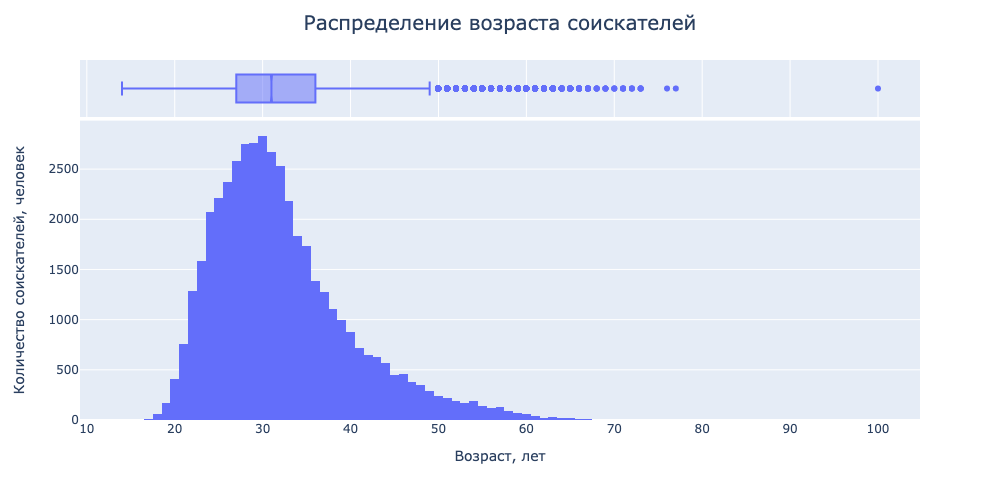

In [26]:
fig = px.histogram(
    hh_data_salary,
    x='Возраст',
    marginal='box',
    nbins=120
)
fig.update_layout(
    title_font_size=20,
    height=500,
    width=1000,
    xaxis_title='Возраст, лет',
    yaxis_title='Количество '
                'соискателей, '
                'человек'
)
fig.update_layout(
    title={
        'text': 'Распределение '
                'возраста соискателей',
        'x': 0.5,
        'xanchor': 'center'
    }
)
fig.show('png')


In [27]:
# fig.write_image('Age.png',
#                  scale=.85,
#                  engine="kaleido")


Выводы:

- Распределение возраста соискателей близко к нормальному с асимметрией вправо.
- Мода возраста соискателей - 30 лет.
- Минимальное и максимальное значения признака составляют от 14 до 100 лет соответственно.
- Возраст большинства соискателей находится в интервале от 18 до 50 лет. Межквартильный диапазон составляет от 27 до 36 лет.
- Исходя из полученной коробчатой диаграммы, можно сделать выводы, что соискатели старше 49 лет находятся в зоне выбросов, но я бы отнес к аномалиям значения возраста старше 49 лет и до 100 лет для поиска работы (предпенсионный возраст и проблемы в обучении сотрудника обязанностям, и последующее непродолжительное получение опыта).

## Задание 4.2

--------

Постройте распределение признака **"Опыт работы (месяц)"**.

Опишите данное распределение, отвечая на следующие вопросы:
1. Чему равна мода распределения?
2. Каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей?
3. Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?

Совет: постройте гистограмму и коробчатую диаграмму рядом.

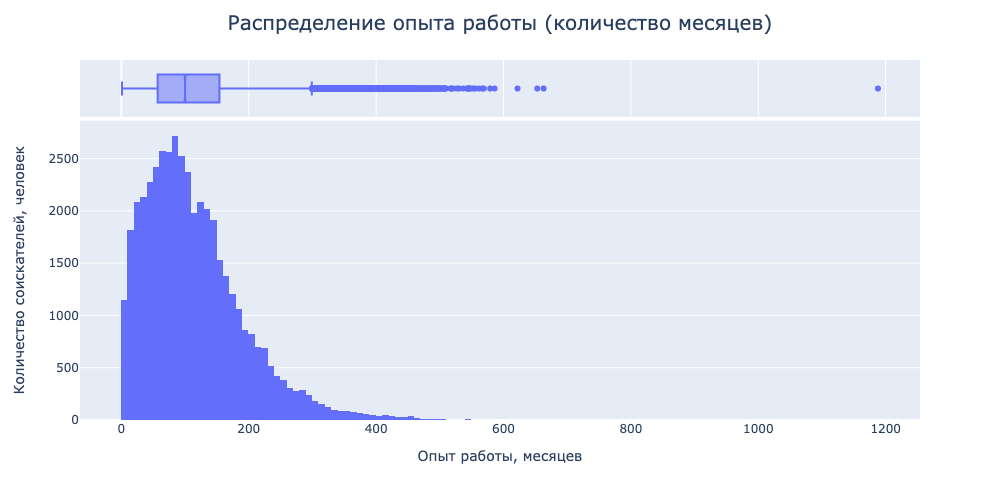

In [28]:
fig = px.histogram(
    hh_data_salary,
    x='Опыт работы (месяц)',
    marginal='box',
    nbins=160
)
fig.update_layout(
    title_font_size=20,
    height=500,
    width=1000,
    xaxis_title='Опыт работы, месяцев',
    yaxis_title='Количество соискателей, '
                'человек'
)
fig.update_layout(
    title={
        'text': 'Распределение опыта '
                'работы (количество месяцев)',
        'x': 0.5,
        'xanchor': 'center'
    }
)
fig.show('png')


In [29]:
# fig.write_image('Work_experience.png',
#                  scale=.85,
#                  engine="kaleido")


Выводы:

- Опыт работы также имеет вид нормального распределения с ассиметрией вправо.
- Мода распределения находится в интервале от 80 до 84 месяцев, примерно 6,5 - 7 лет работы.
- Предельные значения признака опыта работы находятс в итервале 0 - 1188 месяцев или 0 - 99 лет. Верхнее предельное значение, очевидно, аномальное.
- Опыт большинства соискателей находится в интервале от 0 до 355 месяцев или 0 - 30 лет. Межквартильный диапазон составляет от 57 до 154 месяцев.
- Из коробачтой диагармы видно, за пределами правого "уса" довольно много значений, но их плотность уменьшается начиная со значения 510 (42.5 года). Значения правее для опыта от 586 месяцев (49 лет) до 1188 месяцев (99 лет) я бы отнес к аномальным.

 ## Задание 4.3

---------

Постройте распределение признака **"ЗП (руб)"**.

Опишите данное распределение, отвечая на следующие вопросы:

- Каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей?
- Есть ли аномалии для признака ЗП?
- Обратите внимание на гигантские размеры желаемой заработной платы.

Совет: постройте гистограмму и коробчатую диаграмму рядом.

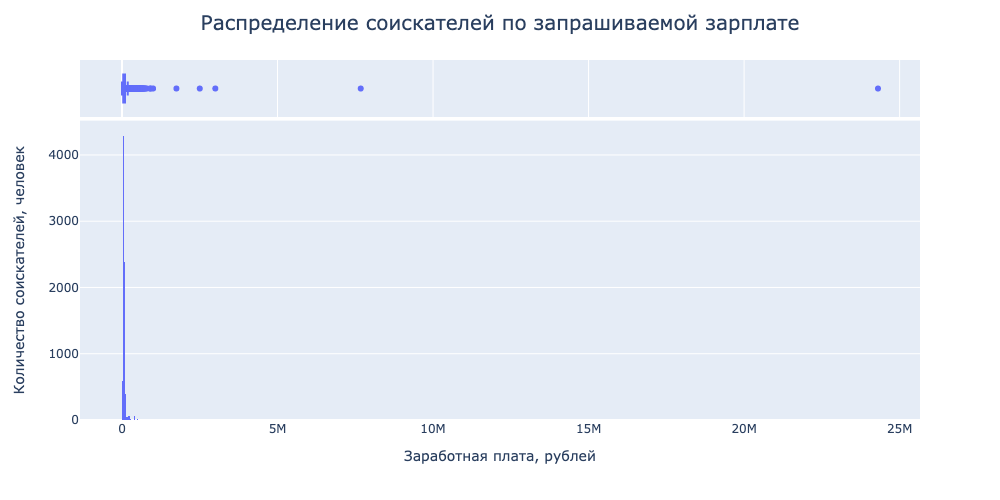

In [30]:
fig = px.histogram(
    hh_data_salary,
    x='ЗП (руб)',
    marginal = 'box'
)
fig.update_layout(
    title_font_size=20,
    height=500,
    width=1000,
    xaxis_title='Заработная плата, '
                'рублей',
    yaxis_title='Количество соискателей, '
                'человек'
)
fig.update_layout(
    title={
        'text': 'Распределение соискателей '
                'по запрашиваемой зарплате',
        'x': 0.5,
        'xanchor': 'center'
    }
)
fig.show('png')


In [31]:
# fig.write_image('PO(rubles).png',
#                  scale=.85,
#                  engine="kaleido")


Выводы:

- Полученное распределение сложно назвать нормальным из-за аномально больших запрашиваемых зарплат, на гистограмме видны многочисленные выбросы.
- Мода распределения составляет 50 тысяч рублей.
- Предельные значения признака находятся в пределах от 1 рубля до 24 миллионов рублей.
- Интервал запрашивай зарплаты так же тяжело оценить из полученной диаграммы.

 ## Задание 4.4

--------

Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**).

Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.

Сделайте выводы по представленной диаграмме:

- Для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы?
- Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?

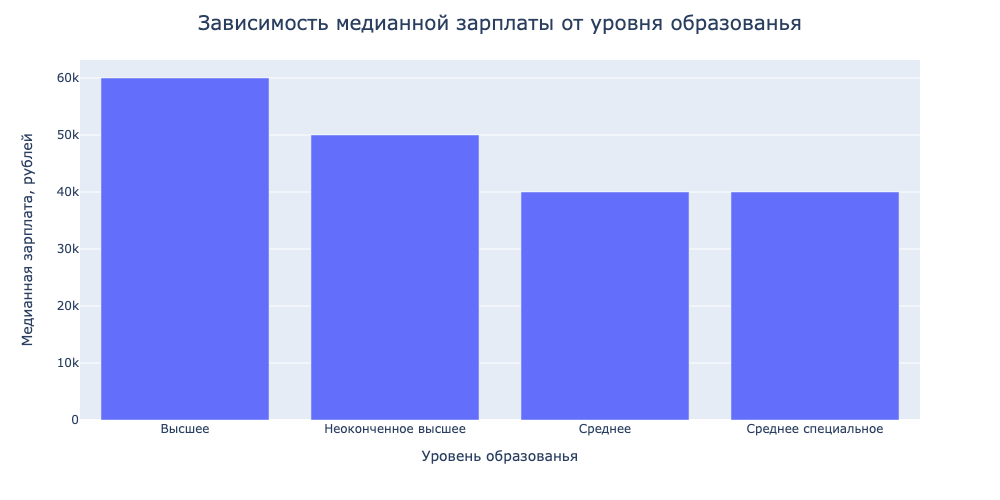

In [32]:
fig = px.bar(
    hh_median
)
fig.update_layout(
    title_font_size=20,
    height=500,
    width=1000,
    xaxis_title='Уровень образованья',
    yaxis_title='Медианная зарплата, рублей',
    showlegend=False
)
fig.update_layout(
    title={
        'text': 'Зависимость медианной зарплаты '
                'от уровня образованья',
        'x': 0.5,
        'xanchor': 'center'
    }
)
fig.show('png')


In [33]:
# fig.write_image('Education.png',
#                  scale=.85,
#                  engine="kaleido")


Выводы:

- Самый высокий уровень желаемой заработной платы (60 тысяч рублей) у соискателей с высшим образованием.
- Самый низкий уровень (40 тысяч рублей) у соискателей со среднеспециальным и средним образованием.
- Уровень образования несомненно является важным признаком при прогнозировании желаемой зарплаты соискателей, поэтому чем выше степень образования, тем выше запрашиваемая зарплата.

 ## Задание 4.5

--------

Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.

Сделайте выводы по полученной диаграмме:

- Как соотносятся медианные уровни желаемой заработной платы и их размах в городах?
- Как вы считаете, важен ли признак города при прогнозировании заработной платы?

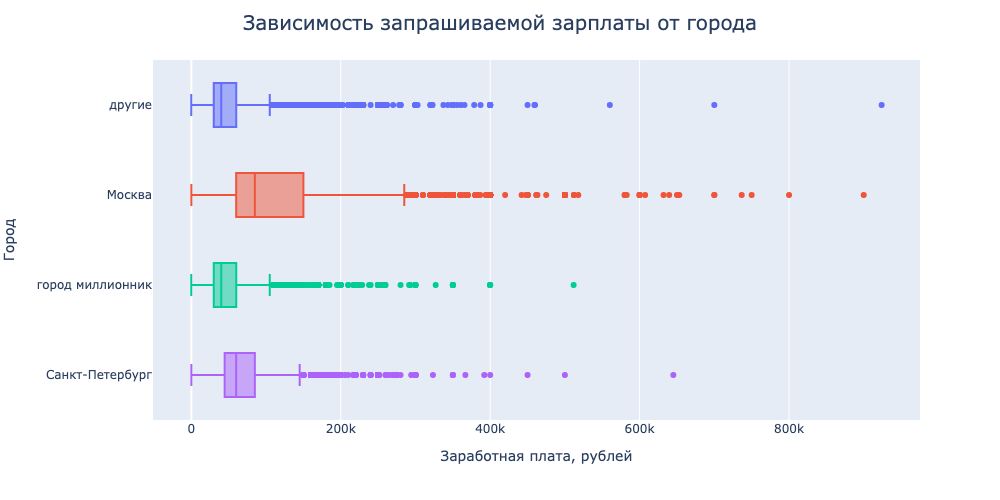

In [34]:
fig = px.box(
    hh_city,
    x='ЗП (руб)',
    y='Город',
    color='Город'
)
fig.update_layout(
    title_font_size=20,
    height=500,
    width=1000,
    xaxis_title='Заработная плата, рублей',
    yaxis_title='Город',
    showlegend=False
)
fig.update_layout(
    title={
        'text': 'Зависимость запрашиваемой '
                'зарплаты от города',
        'x': 0.5,
        'xanchor': 'center'
    }
)
fig.show('png')


In [35]:
# fig.write_image('City.png',
#                  scale=.85,
#                  engine="kaleido")


Выводы:

- В столице медианная заработная плата составляет 85 тысяч рублей, что более чем в 2 раза больше чем в большинстве городов России. Разброс в заработной плате больше почти в 3 раза - 285 тысяч рублей. Москва - самый густонаселенный город России и проживание в нем стоит дороже чем в остальной части России.
- Санкт-Петербург занимает промежуточное место между Москвой и остальной частью России по медианной заработной плате - составляющей 60 тысяч рублей. и разбросу - 145 тысяч рублей.
- В городах-миллионниках и городах из категории другие наблюдаются идентичные медианные заработные платы и разброс 40 и 105 тысяч рублей соответственно.
- Условия проживания определенно оказывают влияние на уровень желаемой заработной платы, поэтому признак города важен при прогнозировании уровня зарплаты.

 ## Задание 4.6

--------

Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы **"ЗП (руб)"** от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

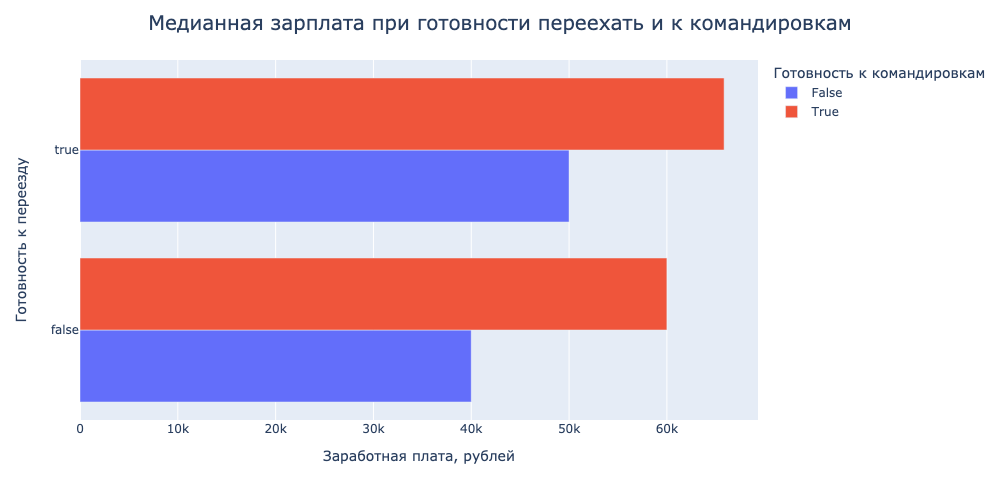

In [36]:
fig = px.bar(
    hh_po,
    x='ЗП (руб)',
    y='Готовность к переезду',
    color='Готовность к командировкам',
    barmode="group",
    orientation='h'
)
fig.update_layout(
    title_font_size=20,
    height=500,
    width=1000,
    xaxis_title='Заработная плата, '
                'рублей',
    yaxis_title='Готовность к переезду',
)
fig.update_layout(
    title={
        'text': 'Медианная зарплата '
                'при готовности переехать '
                'и к командировкам',
        'x': 0.5,
        'xanchor': 'center'
    }
)
fig.show('png')


In [37]:
# fig.write_image('Ready.png',
#                  scale=.85,
#                  engine="kaleido")


Выводы:

- Соискатели указавшие готовность к переездам и командировкам указывают самую большую желаемую заработную плату, медианное значение 67 тысяч рублей.
- Соискатели готовые к командировкам запрашивают на 10 тысяч рублей больше, чем те кто готов к переезду.
- Разница в желаемой заработной плате между соискателями готовыми к переездам и командировкам и соискателями не желающими переезжать и ездить по командировкам составляет 27 тысяч рублей.

 ## Задание 4.7

--------

Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

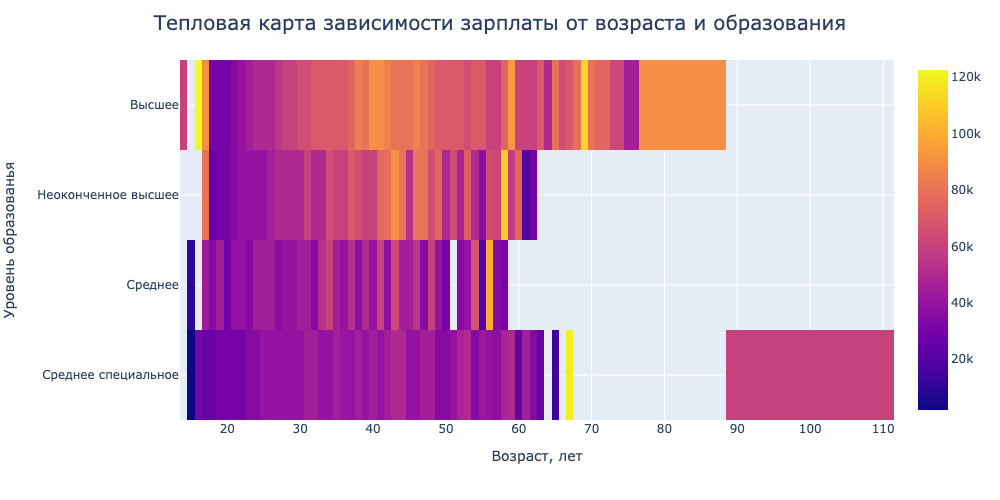

In [38]:
fig = px.imshow(
    hh_heat
)
fig.update_layout(
    title_font_size=20,
    height=500,
    width=1000,
    xaxis_title='Возраст, лет',
    yaxis_title='Уровень образованья'
)
fig.update_layout(
    title={
        'text': 'Тепловая карта зависимости '
                'зарплаты от возраста и образования',
        'x': 0.5,
        'xanchor': 'center'
    }
)
fig.show('png')


In [39]:
# fig.write_image('Salary.png',
#                  scale=.85,
#                  engine="kaleido")


Выводы:

- В среднем во всех четырех категориях уровня образования просматривается равномерное увеличение желаемой заработной платы от 18 до 40 лет, согласно логике накоплений знаний и навыков.
- Далее во всех четырех категориях образования наблюдается неравномерность в желаемой запрашиваемой заработной плате в возрасте от 40 до 77 лет. Высокие заработные платы для соискателей данных возрастных групп могут быть обусловленны наличием уникальных навыков и знаний, так же заметны резкие снижения в требованиях заработной платы, более чем в два раза от средне запрашиваемой, что указывает на невостребованность данных специалистов.
- Наибольшая интенсивность увеличения заработной платы и наиболее плавная наблюдается у соискателей с высшим образованием, самая низкая интенсивность роста заработной платы у соискателей со среднеспециальным образованием.
- Соискатели с высшим образованием сохраняют работоспособность до глубокой старости, при этом стремятся поддерживать уровень своего благосостояния на высоком уровне, сравнимом с 30-35 летними соискателями такого же уровня образования.
- На диаграмме заметны аномалии: например высшее образование у соискателей в возрасте до 21 года, а также требование зарплаты 120 тысяч рублей со среднеспециальным образованием и пенсионным возрастом 67 лет, также возраст 100 лет для поиска рабочего места.

 ## Задание 4.8

--------

Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы **"Опыт работы (месяц)"** от возраста **"Возраст"**. Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше, либо равен возрасту соискателя).

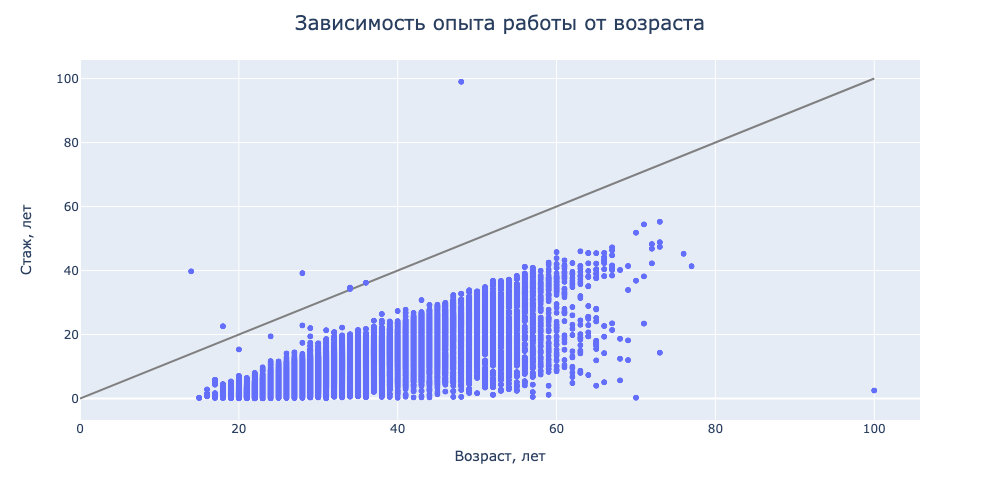

In [40]:
fig = px.scatter(
    hh_seniority,
    y = 'Стаж (лет)',
    x = 'Возраст'
)
fig.update_layout(
    title_font_size=20,
    height=500,
    width=1000,
    xaxis_title='Возраст, лет',
    yaxis_title='Стаж, лет'
)
fig.update_layout(
    title={
        'text': 'Зависимость опыта работы '
                'от возраста',
        'x': 0.5,
        'xanchor': 'center'
    }
)
fig.add_scatter(
    x=[0, 100],
    y=[0, 100],
    mode='lines',
    line_color='gray',
    showlegend=False
)
fig.show('png')


In [41]:
# fig.write_image('Experience.png',
#                  scale=.85,
#                  engine="kaleido")


Выводы:

- На диаграмме видны аномальные/ошибочные данные: 7 точек, лежащих на границе области, где опыт работы больше возраста и над ней.
- Вызывает сомнения достоверность данных об опыте работы в возрасте менее 14 лет, согласно Трудовому кодексу Российской Федерации.
- Присутствуют аномалии в виде возраста 100 лет и стажа 2.5 года, даже если это достоверная информация её можно не принимать во внимание.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


 ## Задание 4.9

--------

Постройте распределение признака **"ЗП (руб)"** с фильтрацией выбросов.

Опишите данное распределение, отвечая на следующие вопросы:

- Каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей?

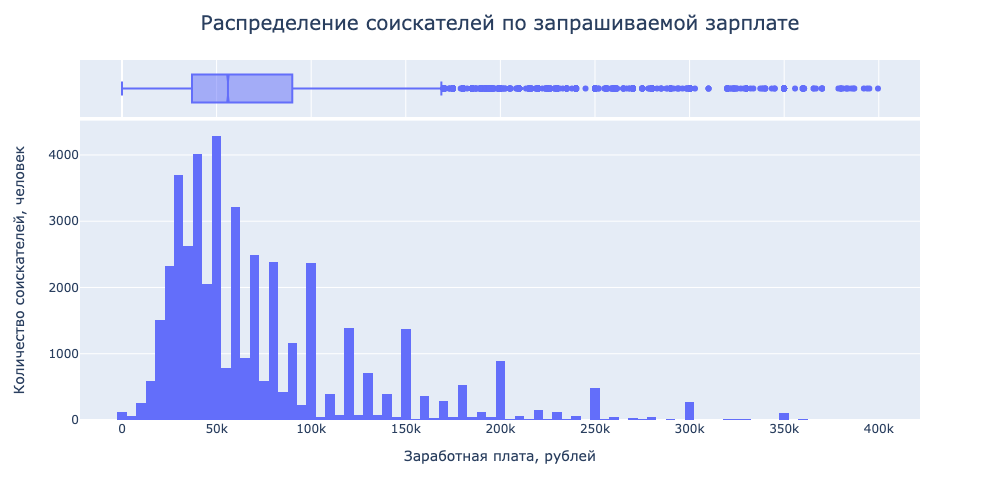

In [42]:
fig = px.histogram(
    salary_filtered,
    x='ЗП (руб)',
    nbins=160,
    marginal = 'box'
)
fig.update_layout(
    title_font_size=20,
    height=500,
    width=1000,
    xaxis_title='Заработная плата, '
                'рублей',
    yaxis_title='Количество соискателей, '
                'человек'
)
fig.update_layout(
    title={
        'text': 'Распределение соискателей '
                'по запрашиваемой зарплате',
        'x': 0.5,
        'xanchor': 'center'
    }
)
fig.show('png')


In [43]:
# fig.write_image('PO_filtered.png',
#                  scale=.85,
#                  engine="kaleido")


Вывод:

- Запрашиваемая зарплата имеет вид нормального распределения с асимметрией вправо.
- Мода распределения находится в интервале от 48 до 53 тысяч рублей.
- Зарплата соискателей находится в интервале от 1 до 169 тысяч рублей. Межквартильный диапазон составляет от 37 до 90 тысяч рублей, с медианным значением 56 тысяч рублей.
- Из коробчатой диаграммы видно, что за пределами правого "уса" довольно много значений, что говорит нам о большом количестве аномалий. Даже при учете фильтрации зарплатных ожиданий до 1 тысячи рублей, что ниже прожиточного минимума, установленного в Российской Федерации и более 1 миллиона рублей.

##  Задание 4.10

--------

Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы **"Стажа (лет)"** от возраста **"Возраст"** с фильтрацией по уровню **"Образование"** .

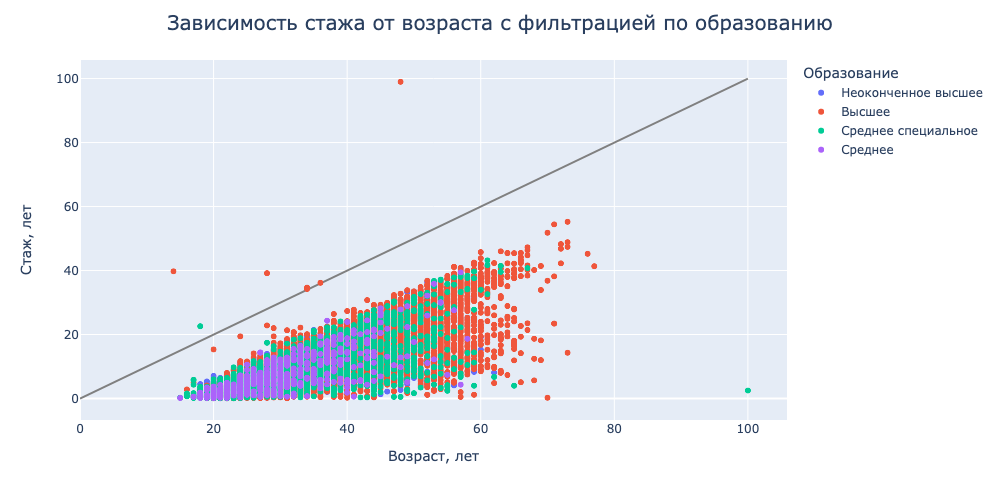

In [44]:
fig = px.scatter(
    hh_seniority,
    y='Стаж (лет)',
    x='Возраст',
    color='Образование'
)
fig.update_layout(
    title_font_size=20,
    height=500,
    width=1000,
    xaxis_title='Возраст, лет',
    yaxis_title='Стаж, лет'
)
fig.update_layout(
    title={
        'text': 'Зависимость стажа '
                'от возраста с фильтрацией по образованию',
        'x': 0.5,
        'xanchor': 'center'
    }
)
fig.add_scatter(
    x=[0, 100],
    y=[0, 100],
    mode='lines',
    line_color='gray',
    showlegend=False
)
fig.show('png')


In [45]:
# fig.write_image('Experience_education.png',
#                  scale=.85,
#                  engine="kaleido")


Выводы:

- Среди соискателей со средним образованием после 40 лет наблюдается спад активности в поиске работы, что говорит нам о подготовке к постепенному выходу на пенсию, согласно Трудовому Кодексу Российской Федерации к 60 годам.
- Среди соискателей со средне специальным образованье после 50 лет наблюдается спад активности в поиске работы, что говорит нам о подготовке к постепенному выходу на пенсию, чуть более позднему чем у соискателей со средним образованием.
- У соискателей с неоконченным высшим образованьем после 50 лет, резкий спад активности в поиске работы, что говорит нам о постепенной подготовке к выходу на пенсию.
- Соискатели с высшим образованьем продолжают поиск подходящего рабочего места и после 60 лет, поэтому признак образованья важный критерий у соискателей.

# <center> Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их.

- Сколько полных копий удалось найти?

In [46]:
# Копирование датафрейма
hh_df_clear=hh_data_salary.copy()
# Переменная для подсчёта копий данных
duplicates = hh_df_clear[hh_df_clear\
    .duplicated(subset=hh_df_clear.columns)]
# Удаление дубликатов в данных
hh_data_clear = hh_df_clear.drop_duplicates()
print(f'Количество полных копий в данных: '
      f'{duplicates.shape[0]} резюме.')
print(f'Результирующее число записей: '
      f'{hh_data_clear.shape[0]} резюме.')


Количество полных копий в данных: 161 резюме.
Результирующее число записей: 44583 резюме.


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах.

- Сколько пропусков в столбце «Опыт работы (месяц)»?

In [47]:
# Обнаружение отсутствующих значений для датафрейма
null_hh = hh_data_clear.isnull()
cols = null_hh.columns
# Переменные для вывода
a = 'пропуск'
b = 'пропуска'
c = 'пропусков'
# Цикл для подсчета количества пропусков в датафрейме
for i in cols:
    gaps_count = null_hh[null_hh[i]][i].count()
    if gaps_count > 0:
        if gaps_count == 1:
            print(f"Признак '{i}' содержит: {gaps_count} {a}.")
        elif gaps_count < 5:
            print(f"Признак '{i}' содержит: {gaps_count} {b}.")
        elif gaps_count > 4:
            print(f"Признак '{i}' содержит: {gaps_count} {c}.")


Признак 'Последнее/нынешнее место работы' содержит: 1 пропуск.
Признак 'Последняя/нынешняя должность' содержит: 2 пропуска.
Признак 'Опыт работы (месяц)' содержит: 168 пропусков.


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

- Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков?

In [48]:
# Переменная для сохранения модального значения
values = {
    'Опыт работы (месяц)': hh_data_clear\
        ['Опыт работы (месяц)'].mode()[0],
    'Последнее/нынешнее место работы': hh_data_clear\
        ['Последнее/нынешнее место работы'].mode()[0],
    'Последняя/нынешняя должность': hh_data_clear\
        ['Последняя/нынешняя должность'].mode()[0],
}
# Функция автоматически найдет и заменит все значения NaN
hh_data_clear = hh_data_clear.fillna(values)
# Переменная для расчета среднего опыта работы
m = round(hh_data_clear['Опыт работы (месяц)'].mean())
print(f"Cреднее значение в столбце "
      f"«Опыт работы» составляет: {m} месяцев.")


Cреднее значение в столбце «Опыт работы» составляет: 114 месяцев.


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

- Сколько выбросов вы нашли?

In [49]:
# Фильтрация зарплаты, которая менее 1 миллиона рублей
# и более 1 тысячи рублей
outliers = (hh_data_clear['ЗП (руб)'] > 1e6) \
           | (hh_data_clear['ЗП (руб)'] < 1e3)
print(f"Количество найденных выбросов: "
      f"{hh_data_clear[outliers]['ЗП (руб)'].count()} резюме.")
# Удаляем записи
hh_data_clear.drop(index=hh_data_clear[outliers]\
                  .index, inplace=True)
print(f'Результирующее число записей: '
      f'{hh_data_clear.shape[0]} резюме.')


Количество найденных выбросов: 89 резюме.
Результирующее число записей: 44494 резюме.


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных.

- Сколько выбросов вы нашли?

In [50]:
# Фильтрация резюме в которых опыт работы
# в годах превышает возраст соискателя
seniority = hh_data_clear[hh_data_clear['Опыт работы (месяц)']
                                /12 > hh_data_clear['Возраст']]
print(f'Результирующее число выбросов: {seniority.shape[0]} резюме.')
# Удаляем записи
hh_data_clear = hh_data_clear.drop(seniority.index, axis=0)
print(f'Результирующее число записей: {hh_data_clear.shape[0]} резюме.')


Результирующее число выбросов: 7 резюме.
Результирующее число записей: 44487 резюме.


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

- Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

- Сколько выбросов вы нашли с помощью метода z-отклонений?

Таблица с полученными выбросами:
31137     15
32950     15
33654    100
Name: Возраст, dtype: int64
Число выбросов по z-методу: 3 резюме.
Результирующее число записей: 44484 резюме.


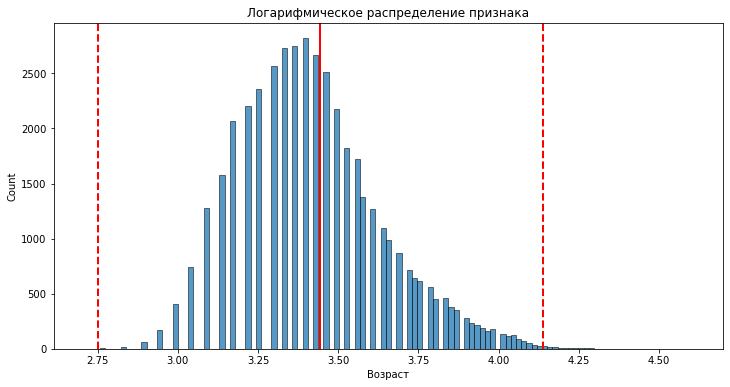

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
log_age = np.log(hh_data_clear['Возраст'])
histplot = sns.histplot(log_age)
histplot.axvline(log_age.mean(), color='r', lw=2)
histplot.axvline(log_age.mean()+ 3 * log_age.std(), color='r', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='r', ls='--', lw=2)
histplot.set_title('Логарифмическое распределение признака')


def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    emissions = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return emissions, cleaned

emissions, cleaned = outliers_z_score_mod\
    (hh_data_clear, 'Возраст', left=3,  right=4, log_scale=True)
print(f'Таблица с полученными выбросами:')
print(emissions['Возраст'])
print(f'Число выбросов по z-методу: {emissions.shape[0]} резюме.')
print(f'Результирующее число записей: {cleaned.shape[0]} резюме.')
# Сохранение датафрейма в переменную
hh_data_clear=cleaned


In [52]:
# fig = histplot.get_figure()
# fig.savefig("Logarithmic.png")


Вывод:

- Мода распределения признака возраста находится левее среднего значения, поэтому это положительная ассиметрия.

In [53]:
# Перевод строки в формат int
hh_data_clear['ЗП (руб)'] = hh_data_clear['ЗП (руб)'].astype(np.int64)
hh_data_clear['Опыт работы (месяц)'] = hh_data_clear['Опыт работы (месяц)'].astype(np.int64)

In [54]:
# Сохраним полученные данные
hh_df_clear.to_csv('hh_database_cleared.csv')